<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/PCA_FEATURE_EXTRACTION/EJERCICIO1/S12_PCA_AlbertRovira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar librerías y crear dataset:

In [18]:
import pandas as pd 
import seaborn as sns
carcrashes = sns.load_dataset("car_crashes")

Dejar solo datos numéricos i borrar NanS

In [6]:
carcrashes_num = carcrashes.select_dtypes(include='number') # mantener solo variables numéricas 
carcrashes_num_nonans = carcrashes_num.dropna() # borrar NaNs

Printar como quedan los datos:

In [8]:
print('datos originales = {}'.format(carcrashes.shape))
print('datos numericos = {}'.format(carcrashes_num.shape))
print('datos numericos sin NaNs = {}'.format(carcrashes_num_nonans.shape))

datos originales = (51, 8)
datos numericos = (51, 7)
datos numericos sin NaNs = (51, 7)


Separar entre X e Y:

In [9]:
X = carcrashes_num_nonans
y = carcrashes['abbrev'] # use origin as class label (not needed in PCA)

Escalar datos:

In [10]:
# scale data:
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(X)

Descomponer:

In [11]:
# PCA decomopositon:
from sklearn import decomposition
n_variables = carcrashes_num.shape[1]
pca = decomposition.PCA(n_components=n_variables).fit(XS)

Printar la varianza acomulada:

In [12]:
# varianza explicada acumulada:
print('varianza explicada acumulada ={}'.format(100*pca.explained_variance_ratio_.cumsum()))

varianza explicada acumulada =[ 57.34216805  79.88521013  87.75095283  92.75851001  96.76951006
  99.60750945 100.        ]


Proyectar los datos:

In [13]:
# project data into PCA space:
Xproj = pca.transform(XS)

Reducir dimensionalidad de los datos quedandonos solamente con tres componentes PCA:

In [25]:
ndim_reducida = 4 # establecer dimensionalidad reducida a partir de la varianza explicada por cada componente
XPCA = Xproj[:,0:ndim_reducida]
print('Dimensionalidad datos en espacio PCA reducido = {}'.format(XPCA.shape))

Dimensionalidad datos en espacio PCA reducido = (51, 4)


Representar los datos en múltiples gráficos bidimensionales:

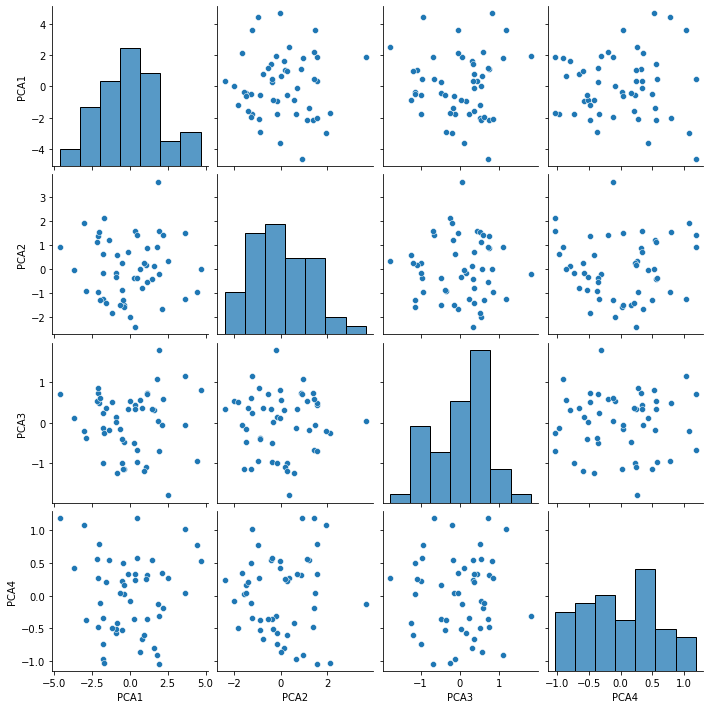

In [26]:
import matplotlib.pyplot as plt
d = pd.DataFrame(XPCA,columns=['PCA1', 'PCA2','PCA3', 'PCA4'])
sns.pairplot(d)
plt.show()